In [32]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, extract, inspect

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

#checck classes found by automap
Base.classes.keys()

['measurement', 'station']

In [3]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [14]:
# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

session.query(Measurement.date, Measurement.tobs)\
            .filter(extract('month', Measurement.date) == 6)\
            .order_by(Measurement.date.asc())\
            .all()

[('2010-06-01', 78.0),
 ('2010-06-01', 74.0),
 ('2010-06-01', 73.0),
 ('2010-06-01', 77.0),
 ('2010-06-01', 69.0),
 ('2010-06-01', 76.0),
 ('2010-06-01', 71.0),
 ('2010-06-01', 74.0),
 ('2010-06-01', 70.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 72.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 70.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 71.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 78.0),
 ('2010-06-03', 78.0),
 ('2010-06-03', 75.0),
 ('2010-06-03', 74.0),
 ('2010-06-03', 77.0),
 ('2010-06-03', 67.0),
 ('2010-06-03', 76.0),
 ('2010-06-03', 72.0),
 ('2010-06-03', 78.0),
 ('2010-06-03', 73.0),
 ('2010-06-04', 76.0),
 ('2010-06-04', 75.0),
 ('2010-06-04', 73.0),
 ('2010-06-04', 75.0),
 ('2010-06-04', 70.0),
 ('2010-06-04', 73.0),
 ('2010-06-04', 72.0),
 ('2010-06-04', 74.0),
 ('2010-06-04', 68.0),
 ('2010-06-05', 77.0),
 ('2010-06-05', 74.0),
 ('2010-06-05', 72.0),
 ('2010-06-05', 73.0),
 ('2010-06-05', 78.0),
 ('2010-06-05', 76.0),
 ('2010-06-05', 79.0),
 ('2010-06-

In [15]:
#  2. Convert the June temperatures to a list.
june_temp = []

june_temp = session.query(Measurement.date, Measurement.tobs)\
            .filter(extract('month', Measurement.date) == 6)\
            .order_by(Measurement.date.asc())\
            .all()

june_temp

[('2010-06-01', 78.0),
 ('2010-06-01', 74.0),
 ('2010-06-01', 73.0),
 ('2010-06-01', 77.0),
 ('2010-06-01', 69.0),
 ('2010-06-01', 76.0),
 ('2010-06-01', 71.0),
 ('2010-06-01', 74.0),
 ('2010-06-01', 70.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 72.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 70.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 71.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 78.0),
 ('2010-06-03', 78.0),
 ('2010-06-03', 75.0),
 ('2010-06-03', 74.0),
 ('2010-06-03', 77.0),
 ('2010-06-03', 67.0),
 ('2010-06-03', 76.0),
 ('2010-06-03', 72.0),
 ('2010-06-03', 78.0),
 ('2010-06-03', 73.0),
 ('2010-06-04', 76.0),
 ('2010-06-04', 75.0),
 ('2010-06-04', 73.0),
 ('2010-06-04', 75.0),
 ('2010-06-04', 70.0),
 ('2010-06-04', 73.0),
 ('2010-06-04', 72.0),
 ('2010-06-04', 74.0),
 ('2010-06-04', 68.0),
 ('2010-06-05', 77.0),
 ('2010-06-05', 74.0),
 ('2010-06-05', 72.0),
 ('2010-06-05', 73.0),
 ('2010-06-05', 78.0),
 ('2010-06-05', 76.0),
 ('2010-06-05', 79.0),
 ('2010-06-

In [16]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temp, columns = ['date','temperature'])
june_df.set_index(june_df['date'], inplace=True)
june_df = june_df[['temperature']]
june_df

,temperature
date,
2010-06-01,78.0
2010-06-01,74.0
2010-06-01,73.0
2010-06-01,77.0
2010-06-01,69.0
...,...
2017-06-30,81.0
2017-06-30,74.0
2017-06-30,75.0


In [17]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 5. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs)\
            .filter(extract('month', Measurement.date) == 12)\
            .order_by(Measurement.date.asc())\
            .all()

[('2010-12-01', 76.0),
 ('2010-12-01', 73.0),
 ('2010-12-01', 73.0),
 ('2010-12-01', 72.0),
 ('2010-12-01', 78.0),
 ('2010-12-01', 72.0),
 ('2010-12-01', 70.0),
 ('2010-12-01', 71.0),
 ('2010-12-02', 72.0),
 ('2010-12-02', 73.0),
 ('2010-12-02', 75.0),
 ('2010-12-02', 71.0),
 ('2010-12-02', 74.0),
 ('2010-12-02', 71.0),
 ('2010-12-02', 74.0),
 ('2010-12-02', 70.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 73.0),
 ('2010-12-03', 71.0),
 ('2010-12-03', 70.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 72.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 67.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 72.0),
 ('2010-12-04', 78.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 75.0),
 ('2010-12-04', 77.0),
 ('2010-12-05', 73.0),
 ('2010-12-05', 71.0),
 ('2010-12-05', 73.0),
 ('2010-12-05', 78.0),
 ('2010-12-05', 66.0),
 ('2010-12-05', 69.0),
 ('2010-12-05', 69.0),
 ('2010-12-06', 64.0),
 ('2010-12-06', 66.0),
 ('2010-12-06', 64.0),
 ('2010-12-06', 66.0),
 ('2010-12-06', 78.0),
 ('2010-12-

In [10]:
# 6. Convert the December temperatures to a list.
dec_temp = []

dec_temp = session.query(Measurement.date, Measurement.tobs)\
            .filter(extract('month', Measurement.date) == 12)\
            .order_by(Measurement.date.asc())\
            .all()

dec_temp

[('2010-12-01', 76.0),
 ('2010-12-01', 73.0),
 ('2010-12-01', 73.0),
 ('2010-12-01', 72.0),
 ('2010-12-01', 78.0),
 ('2010-12-01', 72.0),
 ('2010-12-01', 70.0),
 ('2010-12-01', 71.0),
 ('2010-12-02', 72.0),
 ('2010-12-02', 73.0),
 ('2010-12-02', 75.0),
 ('2010-12-02', 71.0),
 ('2010-12-02', 74.0),
 ('2010-12-02', 71.0),
 ('2010-12-02', 74.0),
 ('2010-12-02', 70.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 73.0),
 ('2010-12-03', 71.0),
 ('2010-12-03', 70.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 72.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 67.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 72.0),
 ('2010-12-04', 78.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 75.0),
 ('2010-12-04', 77.0),
 ('2010-12-05', 73.0),
 ('2010-12-05', 71.0),
 ('2010-12-05', 73.0),
 ('2010-12-05', 78.0),
 ('2010-12-05', 66.0),
 ('2010-12-05', 69.0),
 ('2010-12-05', 69.0),
 ('2010-12-06', 64.0),
 ('2010-12-06', 66.0),
 ('2010-12-06', 64.0),
 ('2010-12-06', 66.0),
 ('2010-12-06', 78.0),
 ('2010-12-

In [18]:
# 7. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temp, columns = ['date','temperature'])
dec_df.set_index(dec_df['date'], inplace=True)
dec_df = dec_df[['temperature']]

dec_df

,temperature
date,
2010-12-01,76.0
2010-12-01,73.0
2010-12-01,73.0
2010-12-01,72.0
2010-12-01,78.0
...,...
2016-12-31,66.0
2016-12-31,71.0
2016-12-31,72.0


In [19]:
# 8. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Additional Queries

In [37]:
#what other data do we have to work with?
inspect(engine).get_columns('Measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

       precipitation
count    1574.000000
mean        0.136360
std         0.335731
min         0.000000
25%         0.000000
50%         0.020000
75%         0.120000
max         4.430000


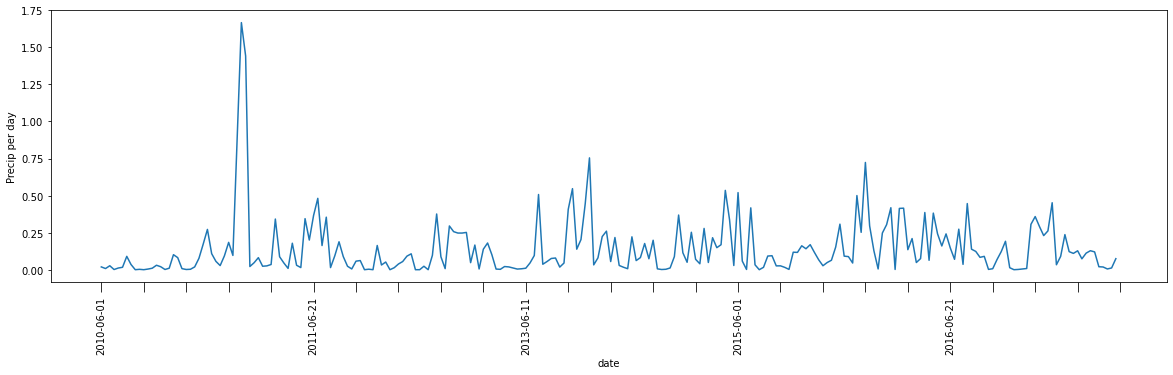

In [89]:
#find precipitation for June
june_precip = session.query(Measurement.date, Measurement.prcp)\
            .filter(extract('month', Measurement.date) == 6)\
            .order_by(Measurement.date.asc())\
            .all()

june_precip_df = pd.DataFrame(june_precip, columns = ['date','precipitation'])
june_precip_df.set_index(june_precip_df['date'], inplace=True)
june_precip_df = june_precip_df[['precipitation']]
june_precip_df = june_precip_df.dropna()

jp_df = june_precip_df.groupby(["date"]).mean()["precipitation"]

jp_df.plot(figsize =(20,5))
plt.tick_params(axis = "x", rotation=90, length=10)
plt.xticks(np.arange(0, 250, step =10.0))
plt.ylabel ("Precip per day")
print(june_precip_df.describe())


In [51]:
#find precipitation for Dec
dec_precip = session.query(Measurement.date, Measurement.prcp)\
            .filter(extract('month', Measurement.date) == 12)\
            .order_by(Measurement.date.asc())\
            .all()

dec_precip_df = pd.DataFrame(dec_precip, columns = ['date','precipitation'])
dec_precip_df.set_index(dec_precip_df['date'], inplace=True)
dec_precip_df = dec_precip_df[['precipitation']]
dec_precip_df = dec_precip_df.dropna()
dec_precip_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
